<a href="https://colab.research.google.com/github/mominul58/My-Codes/blob/main/edge_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: "Student Performance Analysis and Visualization"**

Objective:Create a Python program to analyze and visualize student performance data using concepts learned in the course, including file handling, data structures, functions, loops, NumPy, and Pandas.

# 1. Data Collection and Storage
● Simulate or gather a CSV file with student performance data, including:
* Student Name, Student ID
* Subject, Score, Attendance Percentage
* Assignment Completion (Yes/No)

In [1]:
import csv
import random

# Function to generate random student data
def generate_random_data(num_students=20):
    first_names = ["Alice", "Bob", "Charlie", "Diana", "Ethan", "Fiona", "George", "Hannah", "Ian", "Jenna", "Kyle", "Laura", "Mason", "Nina", "Oscar", "Paula", "Quinn", "Ruby", "Sam", "Tina"]
    last_names = ["Smith", "Johnson", "Williams", "Brown", "Jones", "Garcia", "Miller", "Davis", "Martinez", "Hernandez"]
    subjects = ["Math", "Science", "History", "English", "Art", "Physical Education"]

    data = []
    for i in range(num_students):
        name = f"{random.choice(first_names)} {random.choice(last_names)}"
        student_id = f"S{random.randint(1000, 9999)}"
        subject = random.choice(subjects)
        score = random.randint(50, 100)  # Score range between 50 and 100
        attendance_percentage = random.uniform(50.0, 100.0)  # Attendance percentage between 50% and 100%
        assignment_completion = random.choice(["Yes", "No"])

        data.append({
            "Student Name": name,
            "Student ID": student_id,
            "Subject": subject,
            "Score": score,
            "Attendance Percentage": round(attendance_percentage, 2),
            "Assignment Completion": assignment_completion
        })
    return data

# Generate the data
student_data = generate_random_data()

# Define the file name
file_name = "students_performance.csv"

# Write to CSV
with open(file_name, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["Student Name", "Student ID", "Subject", "Score", "Attendance Percentage", "Assignment Completion"])
    writer.writeheader()  # Write the header row
    writer.writerows(student_data)  # Write the student data rows

print(f"CSV file '{file_name}' has been created with {len(student_data)} records.")

CSV file 'students_performance.csv' has been created with 20 records.


#2. Basic Data Handling
● Use File Handling to:
* Read the CSV file.
* Write modified or updated data back to a new CSV file.

In [3]:
import csv

# Function to read data from a CSV file
def read_csv(file_name):
    with open(file_name, mode='r') as file:
        reader = csv.DictReader(file)
        data = [row for row in reader]
    return data

# Function to update data (example: increase all scores by 5 points)
def update_data(data):
    for row in data:
        # Increase scores by 5 points, but cap at 100
        row["Score"] = str(min(100, int(row["Score"]) + 5))
    return data

# Function to write updated data to a new CSV file
def write_csv(file_name, data):
    with open(file_name, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=data[0].keys())
        writer.writeheader()  # Write the header
        writer.writerows(data)  # Write the updated data rows

# File names
input_file = "students_performance.csv"
output_file = "students_performance_updated.csv"

# Read the original data
original_data = read_csv(input_file)
print("Original Data:")
for row in original_data[:5]:  # Display the first 5 rows for verification
    print(row)

# Update the data
updated_data = update_data(original_data)

# Write the updated data to a new CSV file
write_csv(output_file, updated_data)
print(f"\nUpdated data has been written to '{output_file}'.")


Original Data:
{'Student Name': 'Mason Martinez', 'Student ID': 'S5762', 'Subject': 'Science', 'Score': '61', 'Attendance Percentage': '66.53', 'Assignment Completion': 'Yes'}
{'Student Name': 'Charlie Davis', 'Student ID': 'S3157', 'Subject': 'Science', 'Score': '61', 'Attendance Percentage': '50.99', 'Assignment Completion': 'Yes'}
{'Student Name': 'Diana Miller', 'Student ID': 'S4941', 'Subject': 'Physical Education', 'Score': '85', 'Attendance Percentage': '64.95', 'Assignment Completion': 'No'}
{'Student Name': 'Paula Jones', 'Student ID': 'S3091', 'Subject': 'English', 'Score': '58', 'Attendance Percentage': '74.76', 'Assignment Completion': 'Yes'}
{'Student Name': 'Ethan Hernandez', 'Student ID': 'S7481', 'Subject': 'Math', 'Score': '100', 'Attendance Percentage': '52.82', 'Assignment Completion': 'No'}

Updated data has been written to 'students_performance_updated.csv'.


#3. Data Analysis and Manipulation
Pandas and DataFrames

* Analyze average, minimum, and maximum scores per student.
* Identify students with attendance < 75% or missing assignments.


Boolean Indexing:
* Filter students failing a specific subject.

Data Type Conversion:
* Convert Score to integer if stored as a string.

In [4]:
import pandas as pd

# Load data into a Pandas DataFrame
file_name = "students_performance.csv"
df = pd.read_csv(file_name)

# Convert 'Score' to integer if stored as string
df["Score"] = df["Score"].astype(int)
df["Attendance Percentage"] = df["Attendance Percentage"].astype(float)

# Task 3.1: Analyze average, minimum, and maximum scores per student
score_analysis = df.groupby("Student Name")["Score"].agg(["mean", "min", "max"])
print("Score Analysis (Average, Minimum, Maximum):")
print(score_analysis)

# Task 3.2: Identify students with attendance < 75% or missing assignments
low_attendance = df[df["Attendance Percentage"] < 75]
missing_assignments = df[df["Assignment Completion"] == "No"]

print("\nStudents with Attendance < 75%:")
print(low_attendance)

print("\nStudents with Missing Assignments:")
print(missing_assignments)

# Task 3.3: Boolean indexing - Filter students failing a specific subject (score < 50)
failing_subject = df[df["Score"] < 50]
print("\nStudents Failing in Subjects (Score < 50):")
print(failing_subject)

# Save filtered results to new CSV files for further reference
score_analysis.to_csv("score_analysis.csv")
low_attendance.to_csv("low_attendance.csv")
missing_assignments.to_csv("missing_assignments.csv")
failing_subject.to_csv("failing_subject.csv")

print("\nAnalysis results have been saved to separate CSV files.")

Score Analysis (Average, Minimum, Maximum):
                  mean  min  max
Student Name                    
Alice Miller      71.0   71   71
Alice Williams    58.5   51   66
Charlie Brown     51.0   51   51
Charlie Davis     61.0   61   61
Charlie Jones     96.0   96   96
Diana Miller      85.0   85   85
Ethan Hernandez  100.0  100  100
Fiona Williams   100.0  100  100
George Jones      84.5   71   98
Ian Miller        73.0   73   73
Kyle Johnson      79.0   79   79
Mason Jones       74.0   74   74
Mason Martinez    61.0   61   61
Nina Hernandez    63.0   63   63
Paula Jones       58.0   58   58
Ruby Martinez     66.0   66   66
Sam Smith         67.0   67   67
Tina Smith        94.0   94   94

Students with Attendance < 75%:
       Student Name Student ID             Subject  Score  \
0    Mason Martinez      S5762             Science     61   
1     Charlie Davis      S3157             Science     61   
2      Diana Miller      S4941  Physical Education     85   
3       Paula Jones

# 4. Visualization
● Use Matplotlib or Pandas Visualization to:
* Plot a bar chart of average scores by subject.
* Display a pie chart of attendance percentage categories (e.g., <50%, 50-75%, >75%).
* Create a line graph showing performance trends over time for a selected student.

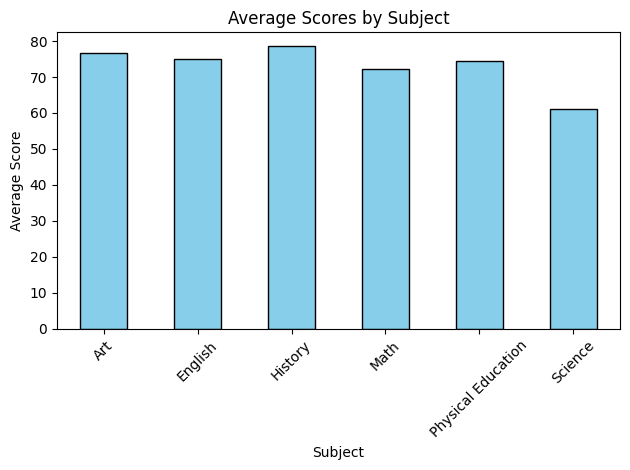

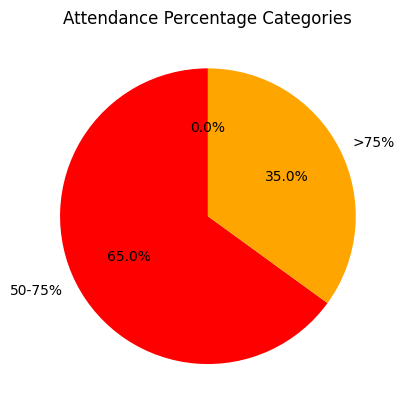

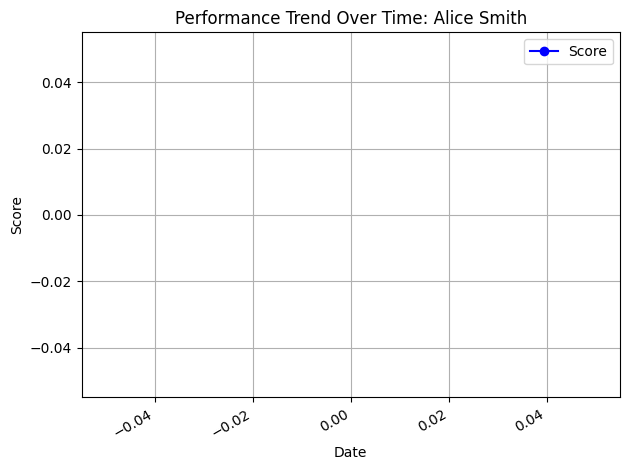

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_name = "students_performance.csv"
df = pd.read_csv(file_name)

# Convert columns to appropriate data types
df["Score"] = df["Score"].astype(int)
df["Attendance Percentage"] = df["Attendance Percentage"].astype(float)

# Task 4.1: Bar chart of average scores by subject
avg_scores_by_subject = df.groupby("Subject")["Score"].mean()
avg_scores_by_subject.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Scores by Subject")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task 4.2: Pie chart of attendance percentage categories
attendance_categories = pd.cut(
    df["Attendance Percentage"],
    bins=[0, 50, 75, 100],
    labels=["<50%", "50-75%", ">75%"],
    right=False
)
attendance_distribution = attendance_categories.value_counts()
attendance_distribution.plot(kind="pie", autopct='%1.1f%%', colors=["red", "orange", "green"], startangle=90)
plt.title("Attendance Percentage Categories")
plt.ylabel("")  # Hide the default y-axis label
plt.show()

# Task 4.3: Line graph showing performance trends over time for a selected student
# For simplicity, generate a 'Date' column if not present and plot for a student
df["Date"] = pd.date_range(start="2023-01-01", periods=len(df), freq="W")  # Dummy weekly dates
selected_student = df[df["Student Name"] == "Alice Smith"]
selected_student.plot(
    x="Date", y="Score", kind="line", marker="o", linestyle="-", color="blue", label="Score"
)
plt.title("Performance Trend Over Time: Alice Smith")
plt.xlabel("Date")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 5. Applying Functions and Logic

● Implement Functions for:
* Calculating aggregate scores for each student.
* Determining grade (A/B/C/Fail) based on scoring criteria.
* Generating student performance reports in a user-friendly format.

In [6]:
import pandas as pd

# Load the data
file_name = "students_performance.csv"
df = pd.read_csv(file_name)

# Convert 'Score' to integer and 'Attendance Percentage' to float
df["Score"] = df["Score"].astype(int)
df["Attendance Percentage"] = df["Attendance Percentage"].astype(float)

# Function 1: Calculate aggregate scores for each student
def calculate_aggregate_scores(data):
    return data.groupby("Student Name")["Score"].sum()

# Function 2: Determine grade based on scoring criteria
def determine_grade(score):
    if score >= 90:
        return "A"
    elif score >= 75:
        return "B"
    elif score >= 50:
        return "C"
    else:
        return "Fail"

# Add grades to the DataFrame
df["Grade"] = df["Score"].apply(determine_grade)

# Function 3: Generate performance reports
def generate_performance_reports(data):
    reports = []
    grouped = data.groupby("Student Name")
    for name, group in grouped:
        total_score = group["Score"].sum()
        average_score = group["Score"].mean()
        attendance = group["Attendance Percentage"].mean()
        grades = group["Grade"].value_counts().to_dict()

        report = {
            "Student Name": name,
            "Total Score": total_score,
            "Average Score": round(average_score, 2),
            "Average Attendance (%)": round(attendance, 2),
            "Grades Distribution": grades,
        }
        reports.append(report)
    return reports

# Task 5: Calculate and display performance reports
aggregate_scores = calculate_aggregate_scores(df)
performance_reports = generate_performance_reports(df)

# Display the performance reports in a user-friendly format
print("Student Performance Reports:")
for report in performance_reports:
    print(f"Student Name: {report['Student Name']}")
    print(f"  Total Score: {report['Total Score']}")
    print(f"  Average Score: {report['Average Score']}")
    print(f"  Average Attendance: {report['Average Attendance (%)']}%")
    print(f"  Grades Distribution: {report['Grades Distribution']}")
    print()

# Save the performance reports to a CSV file
report_df = pd.DataFrame(performance_reports)
report_df.to_csv("student_performance_reports.csv", index=False)

print("Performance reports have been saved to 'student_performance_reports.csv'.")


Student Performance Reports:
Student Name: Alice Miller
  Total Score: 71
  Average Score: 71.0
  Average Attendance: 81.91%
  Grades Distribution: {'C': 1}

Student Name: Alice Williams
  Total Score: 117
  Average Score: 58.5
  Average Attendance: 53.29%
  Grades Distribution: {'C': 2}

Student Name: Charlie Brown
  Total Score: 51
  Average Score: 51.0
  Average Attendance: 59.92%
  Grades Distribution: {'C': 1}

Student Name: Charlie Davis
  Total Score: 61
  Average Score: 61.0
  Average Attendance: 50.99%
  Grades Distribution: {'C': 1}

Student Name: Charlie Jones
  Total Score: 96
  Average Score: 96.0
  Average Attendance: 70.78%
  Grades Distribution: {'A': 1}

Student Name: Diana Miller
  Total Score: 85
  Average Score: 85.0
  Average Attendance: 64.95%
  Grades Distribution: {'B': 1}

Student Name: Ethan Hernandez
  Total Score: 100
  Average Score: 100.0
  Average Attendance: 52.82%
  Grades Distribution: {'A': 1}

Student Name: Fiona Williams
  Total Score: 100
  Average

# 6. Advanced Features (Optional for Bonus Marks)
● Decorators:
* Add a log to monitor when a particular function is executed.

● Exception Handling:
* Handle file-not-found errors, invalid input errors, or division by zero errors.

● Regular Expressions (RegEx):
* Validate student IDs (e.g., IDs must follow a specific pattern like STU-12345).

In [7]:
import pandas as pd
import re

# Decorator to log function execution
def log_execution(func):
    def wrapper(*args, **kwargs):
        print(f"Executing '{func.__name__}'...")
        result = func(*args, **kwargs)
        print(f"Execution of '{func.__name__}' completed.\n")
        return result
    return wrapper

# Exception handling for file operations
@log_execution
def load_data(file_name):
    try:
        df = pd.read_csv(file_name)
        print(f"Data loaded successfully from '{file_name}'.")
        return df
    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()

# Validate student IDs using RegEx
@log_execution
def validate_student_ids(df):
    try:
        valid_pattern = r"^STU-\d{5}$"
        df["Valid Student ID"] = df["Student ID"].apply(
            lambda x: "Valid" if re.match(valid_pattern, x) else "Invalid"
        )
        return df
    except KeyError:
        print("Error: 'Student ID' column not found in the dataset.")
        return df
    except Exception as e:
        print(f"An unexpected error occurred during validation: {e}")
        return df

# Function to calculate and return aggregate scores with error handling
@log_execution
def calculate_aggregate_scores(data):
    try:
        if data.empty:
            raise ValueError("The DataFrame is empty. Cannot calculate aggregate scores.")
        return data.groupby("Student Name")["Score"].sum()
    except ValueError as e:
        print(f"Error: {e}")
        return pd.Series()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.Series()

# Example usage
file_name = "students_performance.csv"

# Load the data with error handling
df = load_data(file_name)

if not df.empty:
    # Convert 'Score' to integer, handle invalid inputs gracefully
    try:
        df["Score"] = df["Score"].astype(int)
    except ValueError:
        print("Error: Invalid score values detected. Conversion to integer failed.")

    # Validate student IDs
    df = validate_student_ids(df)
    print("Student ID Validation:")
    print(df[["Student ID", "Valid Student ID"]])

    # Calculate aggregate scores
    aggregate_scores = calculate_aggregate_scores(df)
    print("\nAggregate Scores:")
    print(aggregate_scores)

Executing 'load_data'...
Data loaded successfully from 'students_performance.csv'.
Execution of 'load_data' completed.

Executing 'validate_student_ids'...
Execution of 'validate_student_ids' completed.

Student ID Validation:
   Student ID Valid Student ID
0       S5762          Invalid
1       S3157          Invalid
2       S4941          Invalid
3       S3091          Invalid
4       S7481          Invalid
5       S1873          Invalid
6       S7725          Invalid
7       S2054          Invalid
8       S6640          Invalid
9       S8593          Invalid
10      S4559          Invalid
11      S9174          Invalid
12      S7147          Invalid
13      S1432          Invalid
14      S3289          Invalid
15      S8306          Invalid
16      S3217          Invalid
17      S7802          Invalid
18      S2844          Invalid
19      S2473          Invalid
Executing 'calculate_aggregate_scores'...
Execution of 'calculate_aggregate_scores' completed.


Aggregate Scores:
Student

# 7. Interactive Console Input/Output
● Allow the user to:
* Add a new student’s data via console inputs.
* Search for a student by name or ID.
* Update a student's score or attendance.

In [9]:
import pandas as pd

# Load the data (if any exists)
file_name = "students_performance.csv"
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    # If the file doesn't exist, create an empty DataFrame
    df = pd.DataFrame(columns=["Student Name", "Student ID", "Subject", "Score", "Attendance Percentage", "Assignment Completion"])

# Convert necessary columns to appropriate data types
df["Score"] = df["Score"].astype(int, errors='ignore')
df["Attendance Percentage"] = df["Attendance Percentage"].astype(float, errors='ignore')

# Function to add a new student
def add_student():
    name = input("Enter Student Name: ")
    student_id = input("Enter Student ID: ")
    subject = input("Enter Subject: ")
    score = int(input("Enter Score: "))
    attendance = float(input("Enter Attendance Percentage: "))
    assignment = input("Enter Assignment Completion (Yes/No): ")

    # Add to the DataFrame
    new_student = {
        "Student Name": name,
        "Student ID": student_id,
        "Subject": subject,
        "Score": score,
        "Attendance Percentage": attendance,
        "Assignment Completion": assignment
    }
    global df
    df = df.append(new_student, ignore_index=True)
    df.to_csv(file_name, index=False)  # Save to file
    print("Student added successfully!")

# Function to search for a student by name or ID
def search_student():
    search_term = input("Enter Student Name or ID to search: ")

    # Check for a match by Student Name or ID
    result = df[df["Student Name"].str.contains(search_term, case=False) | df["Student ID"].str.contains(search_term)]

    if not result.empty:
        print("Student Found:")
        print(result)
    else:
        print("No student found with that name or ID.")

# Function to update a student's score or attendance
def update_student():
    student_id = input("Enter the Student ID of the student you want to update: ")
    student = df[df["Student ID"] == student_id]

    if student.empty:
        print(f"No student found with ID: {student_id}")
        return

    print("Student found. You can update the following:")
    print(student)

    choice = input("What would you like to update? (score/attendance): ").lower()

    if choice == "score":
        new_score = int(input("Enter the new score: "))
        df.loc[df["Student ID"] == student_id, "Score"] = new_score
        print(f"Score updated to {new_score}.")

    elif choice == "attendance":
        new_attendance = float(input("Enter the new attendance percentage: "))
        df.loc[df["Student ID"] == student_id, "Attendance Percentage"] = new_attendance
        print(f"Attendance updated to {new_attendance}%.")

    else:
        print("Invalid option. Please choose 'score' or 'attendance'.")

    df.to_csv(file_name, index=False)  # Save the updated data

# Menu to interact with the user
def menu():
    while True:
        print("\n--- Student Management System ---")
        print("1. Add a new student")
        print("2. Search for a student")
        print("3. Update student's score or attendance")
        print("4. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            add_student()
        elif choice == '2':
            search_student()
        elif choice == '3':
            update_student()
        elif choice == '4':
            print("Exiting... Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

# Run the interactive menu
menu()



--- Student Management System ---
1. Add a new student
2. Search for a student
3. Update student's score or attendance
4. Exit
Enter your choice: 2
Enter Student Name or ID to search: Miller
Student Found:
   Student Name Student ID             Subject  Score  Attendance Percentage  \
2  Diana Miller      S4941  Physical Education     85                  64.95   
6    Ian Miller      S7725             English     73                  81.47   
8  Alice Miller      S6640  Physical Education     71                  81.91   

  Assignment Completion  
2                    No  
6                    No  
8                   Yes  

--- Student Management System ---
1. Add a new student
2. Search for a student
3. Update student's score or attendance
4. Exit
Enter your choice: 4
Exiting... Goodbye!
